In [8]:
include("../EuclidElements.jl");

# Book 1

## Proposition 4

Euclid just did a beautiful proof of equivalent triangles.

### I.4 Base case

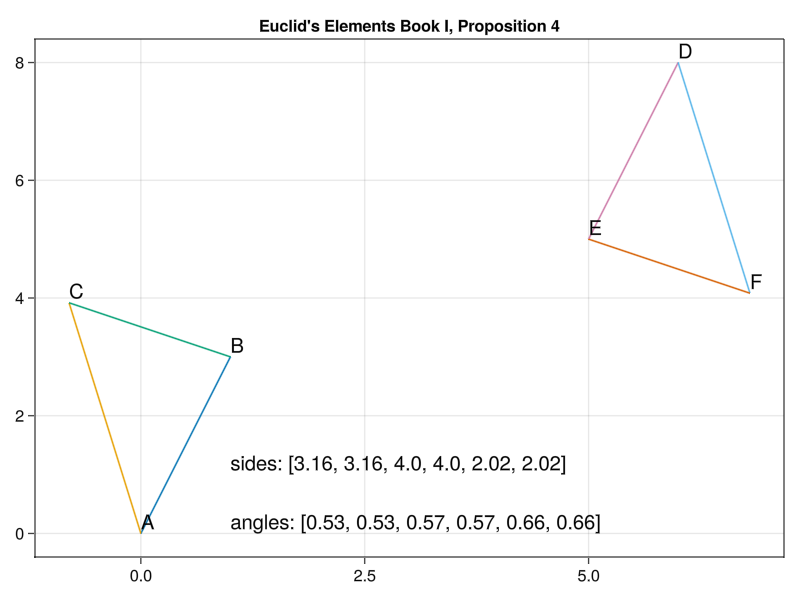

In [2]:
#Define the lengths of 2 sides and the shared angle of a triangle
d_1 = 3
d_2 = 4
θ = π/6

function get_third(A::Point2, B::Point2)
    v = B-A
    u = [cos(θ) -sin(θ); sin(θ) cos(θ)]*v/norm(v)
    C = A + (u*d_2)
end
# Construct triangle ABC starting at 0,0, with B at 1,3 and C where it needs to be from there
A = Point2f(0,0)
B = A + [1, d_1]
C = get_third(A,B)

# Construct triangle DEF starting at 6,8, with E at 6,12 and F where it needs to be from there
D = Point2f(6,8)
E = D - [1, d_1]
F = get_third(D,E)

#setup the chart space...
f = Figure()
Axis(f[1,1], title="Euclid's Elements Book I, Proposition 4")

#Draw the actual stuff
lines!([A,B])
lines!([A,C])
lines!([B,C])

lines!([D,E])
lines!([D,F])
lines!([E,F])

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")

# Draw some info that proves what Euclid was talking about
text!(Point2f(1,1), text="sides: "*string(
    round.(
        [norm(A-B), norm(D-E), norm(A-C), norm(D-F), norm(C-B), norm(F-E)], digits=2)))
text!(Point2f(1,0), text="angles: "*string(
    round.(
        [asin(norm(C-B)/norm(A-C)), asin(norm(E-F)/norm(D-F)),
         atan(norm(B-C)/norm(A-B)), atan(norm(E-F)/norm(E-D)),
         acos(norm(A-B)/norm(A-C)), acos(norm(E-D)/norm(D-F))], digits=2)))

#Draw and show the chart :)
current_figure()

### ANIMATION

In [9]:
#Define the lengths of 2 sides and the shared angle of a triangle
d_1 = 3
d_2 = 4
θ = π/6

function get_third(A::Point2, B::Point2)
    v = B-A
    u = [cos(θ) -sin(θ); sin(θ) cos(θ)]*v/norm(v)
    C = A + (u*d_2)
    Point2f(C)
end
# Construct triangle ABC starting at 0,0, with B at 1,3 and C where it needs to be from there
A = Point2f(0.0,0.0)
B = A + [1, d_1]
C = get_third(A,B)

# Construct triangle DEF starting at 6,8, with E at 6,12 and F where it needs to be from there
D = Point2f(6,8)
E = D - [1, d_1]
F = get_third(D,E)

endpoint = [2.75,0]
∠atend = 0f0

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], title="Euclid's Elements Book I, Proposition 4", aspect=DataAspect())
xlims!(ax, -1.5,8.5)
ylims!(ax, -1,9)

#Draw the actual stuff
tri = compare_triangle(B, A, C, E, D, F, Point2f(endpoint), ∠atend, color=:pink, cursorcolor=:pink, linewidth=5f0, cursorlinewidth=1f0)

lines!([A,B])
lines!([A,C])
lines!([B,C])

lines!([D,E])
lines!([D,F])
lines!([E,F])

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,2π, step=2π/(d_s*framerate))

record(f, "Euclid-I-4.gif", timestamps; framerate=framerate) do t
    animate_tricompare(tri, 0.25π, 1.5π, t)
end;

![animation](Euclid-I-4.gif)